<a href="https://colab.research.google.com/github/0906Bao/TriTueNhanTao/blob/main/Tuan04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import networkx as nx
import matplotlib.pyplot as plt

In [26]:
def read_txt_to_2d_array(file_path):
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    data_2d = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                stripped = line.strip()
                if not stripped:
                    continue
                parts = stripped.split()

                row = []
                for p in parts:
                    try:
                        row.append(int(p))
                    except ValueError:
                        try:
                            row.append(float(p))
                        except ValueError:
                            raise ValueError(f"Non-numeric value '{p}' found in file.")
                data_2d.append(row)

    except Exception as e:
        raise RuntimeError(f"Error reading file: {e}")

    return data_2d

Hàm đọc file TXT thành ma trận 2D

Thực hiện các việc:
*   Kiểm tra file có tồn tại hay không; nếu không sẽ tạo lỗi.
*   Tạo danh sách rỗng để chứa ma trận.
*   Mở file ở chế độ đọc.
*   Loại bỏ dòng trống hoặc dòng chỉ có khoảng trắng.
*   Tách dòng thành các phần tử dựa trên dấu cách.
*   Nếu các phần tử trong file .txt không phải số thì báo lỗi.




In [27]:
def compute_degrees(G):
    return [sum(row) for row in G]

Hàm tính bậc của mỗi đỉnh

In [28]:
def sort_nodes_by_degree(node_list, degree):
    sorted_nodes = []
    used_index = []

    for _ in range(len(degree)):
        max_deg = -1
        pos = None
        for j in range(len(degree)):
            if j not in used_index and degree[j] > max_deg:
                max_deg = degree[j]
                pos = j
        used_index.append(pos)
        sorted_nodes.append(node_list[pos])

    return sorted_nodes

Hàm sắp xếp đỉnh theo bậc giảm dần

Thực hiện các việc:
*   Tạo danh sách chứa thứ tự các đỉnh sau khi sắp xếp và danh sách lưu lại vị trí đã chọn.
*   Chuẩn bị tìm đỉnh có bậc lớn nhất chưa được chọn.
*   Duyệt qua tất cả đỉnh, tìm đỉnh bậc cao nhất chưa được dùng.
*   Cập nhật vị trí của đỉnh có bậc lớn nhất.
*   Thêm đỉnh đã chọn vào danh sách sắp xếp.
Kết quả là thứ tự các đỉnh giảm dần theo bậc.



In [29]:
def color_graph(G, nodes_sorted, node_to_index):
    colorDict = {n: ["Blue", "red", "Yellow", "Green"] for n in node_to_index}
    solution = {}

    for n in nodes_sorted:
        available = colorDict[n]
        solution[n] = available[0]

        adj = G[node_to_index[n]]
        for j in range(len(adj)):
            if adj[j] == 1:
                neighbor = list(node_to_index.keys())[j]
                if available[0] in colorDict[neighbor]:
                    colorDict[neighbor].remove(available[0])

    return solution

Hàm tô màu đồ thị

Thực hiện các việc:
*   Duyệt đỉnh theo thứ tự, lấy màu đầu tiên trong danh sách màu khả dụng.
*   Lấy danh sách các đỉnh kề của đỉnh hiện tại.

Nếu hai đỉnh kề nhau, màu đã chọn của đỉnh hiện tại bị loại khỏi danh sách màu khả dụng của đỉnh kề.


In [30]:
def draw_graph(G, solution, node_list):
    Gx = nx.Graph()
    Gx.add_nodes_from(node_list)

    for i in range(len(G)):
        for j in range(i + 1, len(G)):
            if G[i][j] == 1:
                Gx.add_edge(node_list[i], node_list[j])

    node_colors = [solution[n] for n in node_list]

    pos = nx.spring_layout(Gx, seed=42)
    nx.draw(Gx, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=14)
    plt.title("Đồ thị")
    plt.show()

Hàm Vẽ đồ thị

Thực hiện các việc:


*   Tạo đối tượng đồ thị của thư viện NetworkX.
*   Thêm tất cả đỉnh vào đồ thị.


*   Duyệt ma trận kề, nếu có cạnh (giá trị = 1), thêm cạnh vào đồ thị.
*   Lấy màu tương ứng với từng đỉnh.

*   Lấy danh sách các đỉnh kề của đỉnh hiện tại.Sắp xếp vị trí các đỉnh bằng layout "spring", đảm bảo phân bố đều.


*   Vẽ đồ thị, gán màu và hiển thị.









In [31]:
def main():
    file_path = "b.txt"

    G = read_txt_to_2d_array(file_path)

    node = "ABCDEF"
    node_list = list(node)
    node_to_index = {node_list[i]: i for i in range(len(node_list))}

    degree = compute_degrees(G)

    sorted_nodes = sort_nodes_by_degree(node_list, degree)

    solution = color_graph(G, sorted_nodes, node_to_index)

    for t, w in sorted(solution.items()):
        print(f"Đỉnh {t} = {w}")

    draw_graph(G, solution, node_list)


Gọi và thực thi tất cả các hàm:

* đọc ma trận

* tạo map tên đỉnh

* tính bậc

* sắp xếp đỉnh

* tô màu

* in kết quả

* vẽ đồ thị





Đỉnh A = Yellow
Đỉnh B = Blue
Đỉnh C = red
Đỉnh D = red
Đỉnh E = Blue
Đỉnh F = Yellow


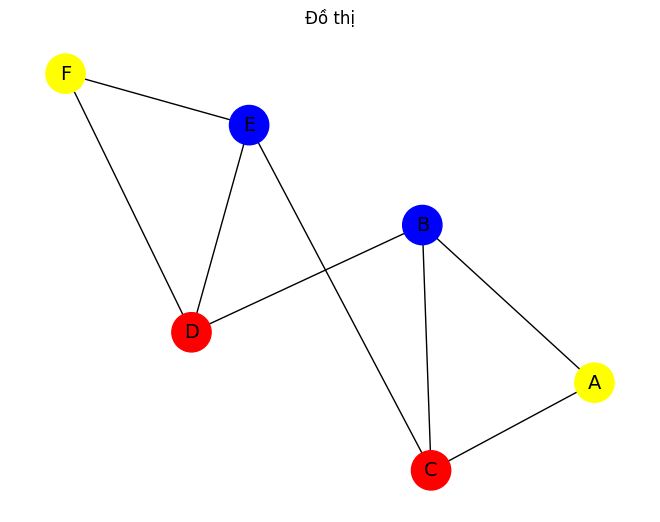

In [32]:
if __name__ == "__main__":
    main()